## N차 과제 - API Scrapping_Reddit

- 주제: API를 활용한 데이터 불러오기 및 분석
- 데이터: 커뮤니티 텍스트 데이터(API 활용)
- 사용 라이브러리: praw, wordcloud, seaborn, nltk

### 1. 라이브러리 및 API 설정

1.1 미국 최대 커뮤니티 중 하나인 레딧(Reddit)에서 데이터를 불러오기 위해 praw 라이브러리를 install 해야 합니다.

In [ ]:
!pip install praw

1.2 라이브러리 설정

In [ ]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

1.3 자연어처리를 위해 사용할 nltk 패키지를 다운로드하겠습니다(NLP 과제가 아니므로 자세히 살펴보지는 않겠습니다).

궁금하신 분들을 위해!
https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

1.4 API 인증을 받겠습니다. 절차의 경우 추가로 첨부한 자료를 참고해주세요.
### **과제를 제출할 때는 본 항목의 API 키들은 모두 지우고 제출해주세요! 공유되면 안 됩니다.**

In [ ]:
#Reddit API 인증
reddit = praw.Reddit(
    client_id='',
    client_secret='',
    user_agent=''
)

### 2. 데이터 수집 및 분석

2.1 본격적으로 API를 활용해 데이터를 불러오겠습니다. 먼저 subreddit을 'stocks'로 설정하고 엔비디아 주식에 대한 게시글을 가져오겠습니다.

In [ ]:
subreddit_name = 'stocks'
search_query = 'NVIDIA OR NVDA'
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.search(search_query, limit=300, sort='top')


2.2 가져온 데이터를 제목과 내용으로 분리된 데이터프레임으로 변환하세요.

In [ ]:
titles = []
texts = []

for post in top_posts:
    titles.append(post.title)
    texts.append(post.selftext)


df = pd.DataFrame({
    'Title': titles,
    'Text': texts
})


df.head(100)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



,Title,Text
0,A note to young investors (or new investors),As the Fed caused a bit of a ripple in the mar...
1,To all of you who are red this year while the ...,Lately I keep hearing the same old narrative f...
2,Pelosi's husband buying over $1 million of com...,[Full Article](https://www.msn.com/en-us/tv/ne...
3,Beware of what AMC shorts are holding!,I understand that most people in this thread i...
4,Blackberry -- A Dormant Giant,###**Abbreviation Index:**\n\nBB -- Blackberry...
...,...,...
95,Nvidia says it didn’t receive antitrust subpoe...,\n\nNvidia on Wednesday denied reports it rece...
96,Nvdia to stop all product sales to Russia,Nvidia on Friday said it’s halting all product...
97,Potential big tech stocks shopping list today,The nasdaq is dropping about 2.5% as of right ...
98,WSJ - S&P 500 ends longest bear market since t...,"U.S. stocks rose Thursday, ending the S&P 500’..."


2.3 가져온 데이터를 토큰화, 불용어 제거 등 분석에 활용하기 위한 전처리를 진행하세요.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   235 non-null    object
 1   Text    235 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [ ]:
stop_words = set(stopwords.words('english'))

text = ' '.join(df['Text'].astype(str))
tokens = word_tokenize(text)

filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalnum()]
filtered_tokens

['Fed',
 'caused',
 'bit',
 'ripple',
 'market',
 'today',
 'considered',
 'vacating',
 'position',
 'ultimately',
 'thought',
 'little',
 'bit',
 'journey',
 'years',
 'thought',
 'share',
 'story',
 'things',
 'learned',
 'Back',
 '2003',
 'made',
 'first',
 'move',
 'stock',
 'market',
 'taking',
 '1800',
 'tax',
 'return',
 'buying',
 '200',
 'shares',
 'coal',
 'company',
 'called',
 'Consol',
 'time',
 'traded',
 'symbol',
 'CNX',
 'bought',
 'almost',
 'DD',
 'simply',
 'paid',
 'pretty',
 'good',
 'dividend',
 'Around',
 'recall',
 'correctly',
 'back',
 'internet',
 'trading',
 'really',
 'thing',
 'bought',
 'bank',
 'trade',
 'cost',
 '40',
 'actually',
 'call',
 'broker',
 'bank',
 'place',
 'trade',
 'phone',
 'Ancient',
 'times',
 'right',
 'lol',
 'figured',
 'win',
 'lose',
 'draw',
 'eventually',
 'stock',
 'pay',
 'dividend',
 'follow',
 'market',
 'much',
 'really',
 'holding',
 'dividend',
 'realized',
 'couple',
 'years',
 'later',
 'climbed',
 '30s',
 'Around',
 '

2.4 전처리된 데이터를 활용해 어떤 단어가 가장 많이 나왔는지 WordCloud를 통해 확인하세요.

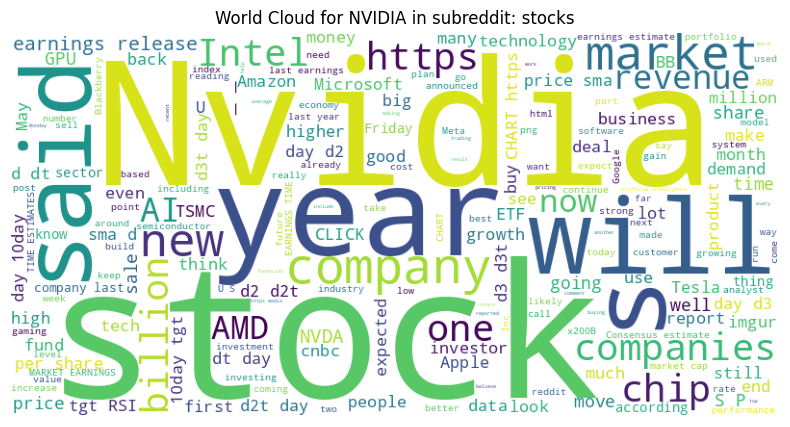

In [ ]:
text = ' '.join(df['Text'].astype(str))                                                    # 모든 텍스트를 하나의 문자열로 결합
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)      # 워드 클라우드 생성(가로,세로,배경)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)                                                                     # 워드클라우드 이미지 표시
plt.title('World Cloud for NVIDIA in subreddit: stocks')                                  # 워드클라우드 제목
plt.axis('off')                                                                           # 축 제거
plt.show()

Nvidia,stock,year,will 등이 많이 나왔다.

2.6 가장 많이 나온 단어에는 어떤 것들이 있는지 barplot을 그려 확인하세요.

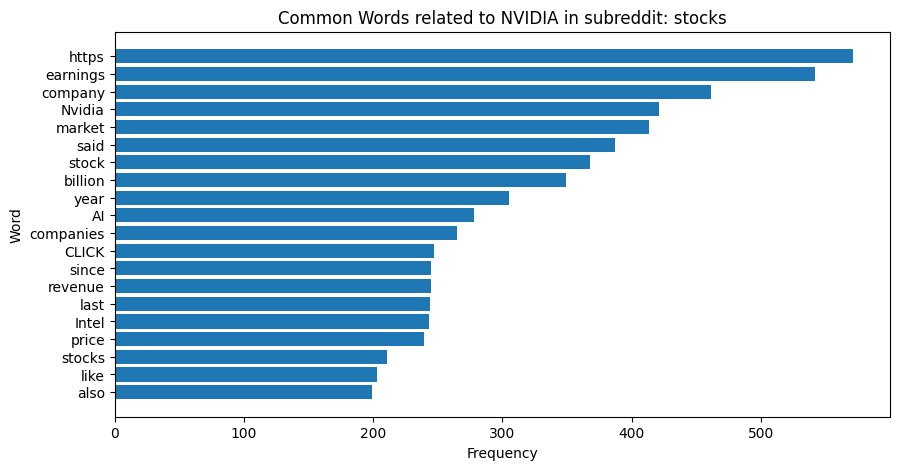

In [ ]:
word_counts = Counter(filtered_tokens)                            # 불용어 제거 및 토큰화한 텍스트에서 단어 카운팅
most_common_words = word_counts.most_common(20)                   # 가장 많이 나온 단어 20개
word, frequency = zip(*most_common_words)                         # zip(*)을 통해 word,frequency로 분리

df2 = pd.DataFrame({'Word': word, 'Frequency': frequency})        # 단어명 및 단어별 빈도로 구성된 데이터프레임 생성
df2 = df2.sort_values('Frequency', ascending=True)                # 빈도별 오름차순 정렬


# 가로 막대그래프 생성
plt.figure(figsize=(10, 5))
plt.barh(df2['Word'], df2['Frequency'])
plt.title("Common Words related to NVIDIA in subreddit: stocks")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

https, earnings, company, Nvidia, market 등이 있다.

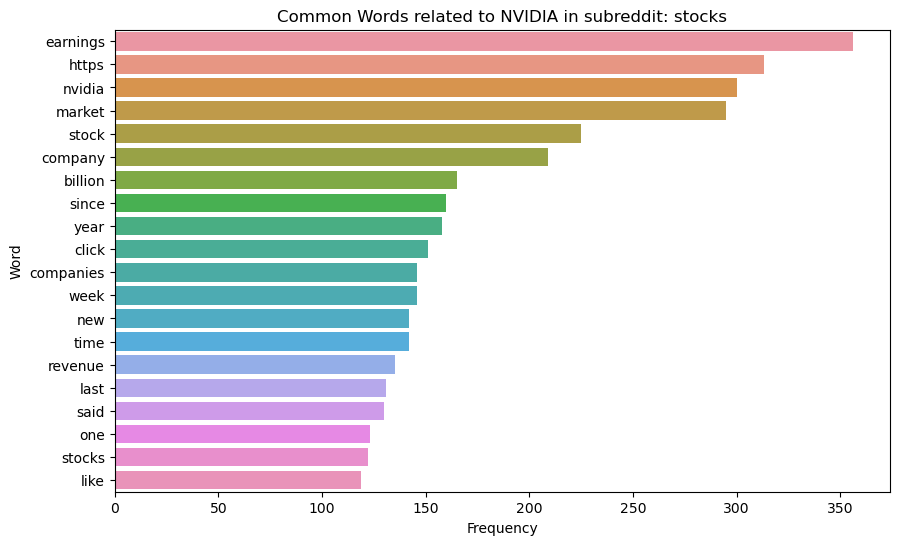

# **제출 시 API 인증 부분의 id, secret은 모두 지우고 제출해주세요!**

### 3. 자유 분석

위에서 진행한 분석만으로는 유의미한 인사이트를 도출하기는 어렵습니다. 추가적인 분석을 통해 해당 주식에 대한 평가가 긍정적인지, 또는 어떠한 이슈가 있는지 확인하는 것과 같은 추가적인 분석을 진행해주세요. 게시글이 아닌 리뷰를 가져오는 것도 가능합니다.

또한 본 분석에서 사용한 데이터가 아닌 다른 데이터를 활용하거나 또 다른 커뮤니티 혹은 사이트에서 API를 받아와 새로운 주제를 가지고 분석하는 것도 좋습니다:)

In [ ]:
# 데이터 감성 분석을 위해 다운로드
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')

from nltk.corpus import sentiwordnet as swn

# 감성 점수 계산 함수
def score(tokens):
    pos = 0
    neg = 0

    for word in tokens:
        synsets = list(swn.senti_synsets(word))              # word별로 감성 점수를 가진 단어 조회한 synsets 리스트
        if synsets:
            senti = synsets[0]                               # 첫번째 synset에서 긍정,부정점수 합산
            pos += senti.pos_score()
            neg += senti.neg_score()

    return pos, neg

# 감성 점수 계산
positive, negative = score(filtered_tokens)

if positive > negative:
    result = '긍정적 반응'
elif positive_score < negative_score:
    result = '부정적 반응'
else:
    result = '동일한 반응'

print("긍정: {}점, 부정: {}점, 결과: {}".format(positive, negative, result))


[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


긍정: 2513.931점, 부정: 1558.444점, 결과: 긍정적 반응


Nvidia 주식에 대한 반응이 긍정인지 부정인지에 대한 감성 분석을 시도했다.
- 불용어 제거 및 토큰화된 단어들을 가지고 진행
- 긍정적 단어와 부정적 단어로 분류
- 긍정일 경우에는 긍정스코어 누적, 부정일 경우에는 부정스코어를 누적하는 방식으로 점수 합산
- 긍정 총합 약 2513점, 부정 총합 약 1558점으로 해당 주식에 대해서는 긍정적 반응이라는 것을 알 수 있다.
